In [64]:
import pandas as pd
import numpy as np

In [65]:
df=pd.read_csv("../Pandas Dataset/Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [66]:
df.Gender.value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [67]:
df.MaritalStatus.value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [68]:
df["Gender"]=df["Gender"].str.replace("Fe Male","Female")
df["MaritalStatus"]=df["MaritalStatus"].str.replace("Single","Unmarried")


In [69]:
df.Gender.value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [70]:
df.MaritalStatus.value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [71]:
df.drop("CustomerID",axis=1,inplace=True)

In [72]:
df.dtypes

ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

<Axes: >

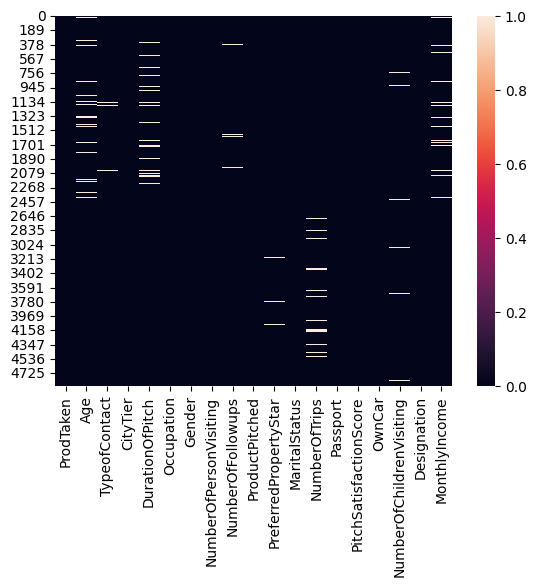

In [73]:
import seaborn as sns
sns.heatmap(df.isnull())

In [74]:
null_contains=[i for i in df.columns if df[i].isnull().sum()>=1]
null_contains

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [75]:
df[null_contains].head()

,Age,TypeofContact,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
0,41.0,Self Enquiry,6.0,3.0,3.0,1.0,0.0,20993.0
1,49.0,Company Invited,14.0,4.0,4.0,2.0,2.0,20130.0
2,37.0,Self Enquiry,8.0,4.0,3.0,7.0,0.0,17090.0
3,33.0,Company Invited,9.0,3.0,3.0,2.0,1.0,17909.0
4,NaN,Self Enquiry,8.0,3.0,4.0,1.0,0.0,18468.0


In [76]:
df["Age"].fillna(df["Age"].mean(),inplace=True)
df["TypeofContact"].fillna(df["TypeofContact"].mode()[0],inplace=True)
df["DurationOfPitch"].fillna(df["DurationOfPitch"].interpolate(),inplace=True)
df["NumberOfFollowups"].fillna(df["NumberOfFollowups"].mode()[0],inplace=True)
df["PreferredPropertyStar"].fillna(df["PreferredPropertyStar"].mode()[0],inplace=True)
df["NumberOfTrips"].fillna(df["NumberOfTrips"].mode()[0],inplace=True)
df["MonthlyIncome"].fillna(df["MonthlyIncome"].mean(),inplace=True)
df["NumberOfChildrenVisiting"].fillna(df["NumberOfChildrenVisiting"].mode()[0],inplace=True)

In [77]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [78]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [79]:
x=df.drop("ProdTaken",axis=1)
y=df["ProdTaken"]

In [80]:
numaric_features=x.select_dtypes(exclude=["object"]).columns
catagorical_features=x.select_dtypes(include=["object"]).columns

In [81]:
onehotencode=OneHotEncoder(drop="first")
scaler=StandardScaler()

column_transformer=ColumnTransformer(
    transformers=[
        ("OneHotEncoder",onehotencode,catagorical_features),
        ("StandardScaler",scaler,numaric_features)
    ]
)

In [82]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.75,random_state=45)

In [83]:
x_train=column_transformer.fit_transform(x_train)

In [84]:
x_test=column_transformer.transform(x_test)

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier()
logistic=LogisticRegression()
adaboost=AdaBoostClassifier()

In [86]:
logistic.fit(x_train,y_train)

LogisticRegression()

In [87]:
y_predict=logistic.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.8428805237315876

In [88]:
adaboost.fit(x_train,y_train)

AdaBoostClassifier()

In [89]:
y_predict=adaboost.predict(x_test)
accuracy_score(y_predict,y_test)

0.8338788870703764

In [90]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [91]:
y_predict=tree.predict(x_test)
accuracy_score(y_predict,y_test)

0.9238952536824877